<a href="https://colab.research.google.com/github/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/5_raster_landscape_enviro_data_cfediting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Land use and archaeological visibility**

 In this exercise, we'll be relating learning to access information about the environment or landscape in a raster format. We'll then be relating the locations of visible sites to various environmental factors. <br> So far in this course you've been working mostly with vector data (points, lines, polygons) but now you're going to work with rasters as well. Environmental data is often held in a raster format because the data is continuous (see *Raster versus Features* below for more details). Elevation is everywhere, right? So if you have a big image file (a raster) you can have a value for elevation in pretty much every pixel of that file.  

Therefore this week practical lab aims to use rasters to explore (and investigate of course):
* **environmental properties of landscapes** 
* **physical properties (e.g. elevation) of landscapes**



####**Rasters versus Features**####

In #*codecell_StreetGridOrientations_geodataframe*, we have started to talk about vector feature data and why topology characterisation was important in geographical information systems. Vectors are not the only way to represent the world and what's in it, raster is another format used in GIS... because:
*	Different representation is more suitable for different types of data
*	Different representation is more suitable for different types of data processing and analysis 

> ||
>--- |--- |
>|
> <img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Lab5_workingwithrasters_points.png?raw=1" width="400"/> </div> |
><img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Lab5_workingwithrasters_lines.png?raw=1" width="400"/> </div> |
><img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Lab5_workingwithrasters_polygons.png?raw=1" width="400"/> </div>|

There are different **types** of raster data as illustrated below:
> ||
>--- |--- |
>Image raster (geology.com)|Attributes rasters (met.office)|
><img src="https://geology.com/world/satellite-image-of-united-kingdom.jpg" width="250"/> </div> |<img src="https://www.metoffice.gov.uk/binaries/content/gallery/metofficegovuk/images/weather/learn-about/weather/rainfall-average-uk.jpg/rainfall-average-uk.jpg/metofficegovuk%3Axsmall" width="300"/> </div> |

Cells have a **pixel** value (=picture element and relates to resolution & to their position on the surface) and a **grid** cell value (size in units) and each cell has **attributes** stored in the array. For instance, this attribute can relate to spectral reflectance (ranging from 0-255), colour (RGB is 3 attributes) or numeric values (which can be associated with a full description through a join with a Look-Up_Code -LU_code- such as a reference tables for Land Use map).<br><br>
*Example of a Raster Array composition* <br> <img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Lab5_comporaster.png?raw=1" width="300"/> </div>

____



### Let's get started...####  
<font color='orangered'> ~ déjà vu ~</font> 
* Make your own copy of this notebook;
* Get your tools;
* Remember to hit play or type 'Ctrl'+'Enter' to run the code in any cell (grey shaded cells in the page) to make things happen!

In [0]:
##codecell_RasterLandscape_ImportUrLibraries

!pip install rasterio
!pip install elevation
!pip install richdem

     |████████████████████████████████| 15.1MB 154kB/s 
     |████████████████████████████████| 71kB 3.8MB/s 
  Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
     |████████████████████████████████| 4.5MB 2.7MB/s 



**Learning a new language – decomposing the code** 
  <br>
In #codecell_RasterLandscape_ImportUrLibraries, <font color='magenta'> !pip </font> is a package management system to install manage software packages. we have already used this last week to install *fiona* and *geopandas* and *pysal*.
We are using reference data for this practical which include 
* *rasterio* reads and writes raster formats to manipulate them and creates new ones ([ref](https://0rasterio.readthedocs.io/en/stable/quickstart.html)); 
* *richdem* are sets of digital elevation model  or digital representaion of elevation heights in a three-dimensional space/landscape ([ref](https://richdem.readthedocs.io/en/latest/)); 
* *elevation* provides the height data ([ref](https://pypi.org/project/elevation/) & [elevation intensive tutorials](https://www.earthdatascience.org/tutorials/python/elevation/)).



In [0]:
##codecell_RasterLandscape_ImportUrLibraries

import rasterio     
# import the main rasterio function
#read, read-write, and write access to raster data files

import matplotlib   
# We have use this library lab4SpatialPatterns
# matplotlib is the primary python plotting and viz library

%matplotlib inline  
# this bit of magic allows matplotlib to plot inline in a jupyter notebook


# We can check which version we're running by printing the "__version__" variable
print("rasterio's version is: " + rasterio.__version__)
print(rasterio)

rasterio's version is: 1.1.0
<module 'rasterio' from '/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py'>


##**Raster dataset to inform on the landscape environmental properties**##

   
    



###**Raster image**###
Start by reading in a raster dataset in the form of an image. 

####**Let's open a raster image**####

In [0]:
##codecell_RasterLandscape_OpenImage

# filepath to our image
img_fp = 'http://ropitz.github.io/digitalantiquity/data/LE70220492002106EDC00_stack.gtif'

# Open a geospatial dataset
# open() handles your file
# this function allows you to open a file and return it as a file object
dataset = rasterio.open(img_fp)
print(dataset)

<open DatasetReader name='http://ropitz.github.io/digitalantiquity/data/LE70220492002106EDC00_stack.gtif' mode='r'>


####**Which kind of Raster Attributes**####
Let's learn some basic things about the image data.

In [0]:
##codecell_RasterLandscape_ImageMetadata

# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Does the raster have a description or metadata?
desc = dataset.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

# Does the raster have a metadata?
metadata = dataset.meta
print('All raster metadata:')
print(metadata)
print('\n')

Image filename: http://ropitz.github.io/digitalantiquity/data/LE70220492002106EDC00_stack.gtif

Number of bands in image: 8

Image size is: 250 rows x 250 columns

Raster description: ('band 1 reflectance', 'band 2 reflectance', 'band 3 reflectance', 'band 4 reflectance', 'band 5 reflectance', 'band 7 reflectance', 'band 6 temperature', 'Band 8')

Raster driver: GTiff

Image projection:
EPSG:32615 

Image geo-transform:
| 30.00, 0.00, 462405.00|
| 0.00,-30.00, 1741815.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 250, 'height': 250, 'count': 8, 'crs': CRS.from_epsg(32615), 'transform': Affine(30.0, 0.0, 462405.0,
       0.0, -30.0, 1741815.0)}




#####**Learning a new language – decomposing the code**#####

In *#codecell_RasterLandscape_OpenImage*, <font color='magenta'> rasterio </font> allows you to open the raster via the function <font color='redpu'> .open() </font>  and returns it as Dataset object.<br>

In *#codecell_RasterLandscape_Attributes*, you wanted to know a bit more about this raster, in particular its  **attributes** & **metadata** by calling information on:
*  the image name, the number of bands and the image size  which is a description of the array and its number of rows and columns: <br> 

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding_.png?raw=1" width="1200"/>
</div>

* the description of raster's file format. here, this is a description of the 8 bands (*see above from the command dataset.count*):
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding__2.png?raw=1" width="1200"/>
</div>


* the image's projection
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding_3.png?raw=1" width="1200"/>
</div>

EPSG:32615 - is world projection used principally for the north Hemisphere - 96oW to 90oW (red box in image below) & in large and medium scale topographic mapping and engineering survey. This [webpage](https://spatialreference.org/ref/epsg/wgs-84-utm-zone-15n/)  provides you with other possible formatting/coding option to use this projection in other software.<br> <img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding3b.png?raw=1" width="300"/>
</div> <br>


* by calling <font color='redpu'> .dataset.transform</font>,  you are asking how the orignal image pixels have been transformed to the projected coordinates 
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding__4.png?raw=1" width="1200"/>
</div>

<br><br> *what does this mean?* 
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding_6.png?raw=1" width="300"/></div> <br>
You can see in the answer from <font color='redpu'> .dataset.transform </font>  that is very much like what you've experienced in lab3_StreetGrid_Orientation with the north-up transformation when we needed to rearrange the street axes to run northward (*##codecell_StreetGridOrientations_RearrangeAxes*) and what you have seen in lab2 especially in *#codecell__Webmaps& Distributions_CheckingZeData*).  In our case, the results are showing an affine transformation:

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Lab5_workingwithrasters_transform.png?raw=1" width="300"/>
</div><img src="https://kartoweb.itc.nl/geometrics/Bitmaps/coordtrans%20control%20points6.gif" width="300"/>

...but, there are other way to transform an image, this could be by using conformal or polynomial transformation for a 2D projection(x&y axes) and you see below what 2D transformation can do to your image (if you want a more detailed explanation on how and why coordinates are transformed [here](https://kartoweb.itc.nl/geometrics/Coordinate%20transformations/coordtrans.html)):

</div> </div><img src="http://resources.esri.com/help/9.3/arcgisengine/java/gp_toolref/coverage_tools/transform_arc3.gif" width="300"/> </div><br>

  

* Finally, we are calling for the raster metadata, which is the important part of your data that you will need to provide:

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/rastershelponcoding_5.png?raw=1" width="1200"/>
</div>

---



####**Image raster bands: let's visualise**####
That's is the fun part...



#####***But what are image bands?***#####
Raster dataset contains one or more layers called bands. For instance, a colour image can have three bands using RBG, with 1 band Red,1 band Green, and 1 band Blue:<br>
<br><img src="http://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-4B68F91A-9C87-4012-A92F-7CD18BD1F9EE-web.png" width="300"/> </div> 
<br>  An image can also be a multispectral image with many bands such as remote sensing data which is a recombination of the electromagnetic spectrum to create a multiband raster data. This is where every cell location has more than one value associated with it. You  might have heard of Near Infrared (NIR), well these raster images have 8 bands and they come with each band as a separate file (bands 2,3,4 and 8 which are Blue, green, red, and NIR respectively) (see more [here](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites?qt-news_science_products=0#qt-news_science_products)). Infrared (and ultraviolet) are that bit of the spectrum we cannot see with our own eyes.  <br><br>
<img src="http://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-4F5A176A-D52A-4F07-9C2E-9922C1B6097D-web.gif" width="300"/> </div> <img src="http://dew.globalsystemsscience.org/_/rsrc/1472777338633/key-messages/near-infrared-and-the-electromagnetic-spectrum/irdiagram.png" width="300"/> </div> <br>
*You can learn more how band combinations works in [this](http://biodiversityinformatics.amnh.org/interactives/bandcombination.php) interactive platform using 3 types remotely sensed images (MODIS, ASTER and Landsat)*.<br><br>
And, an image can also have one band can be a digital elevation model (DEM) where the cell holds elevation values.


The rasterio Dataset object we created contains a lot of useful information but it is not directly used to read in the raster image. Instead, we will need to access the raster's bands using the (<font color='magenta'> read() </font>) method:

In [0]:
##codecell_RasterLandscape_CheckShapOfBands

# Let's open fourth band in our image
# read() function that allow us to specify a subset of the raster band into the arguments ()
nir = dataset.read(4)

# Using function .shape we want to check out the dimensions of the image

nir.shape 
# #same as in ##codecell_RasterLandscape_ImageMetadata 
# by using .read() for all bands, the answer should have been (8, 250, 250)
# .shape answer provides you with # bands, rows, cols
# but images can be very very large files, so it is better to do this bit by bit

(250, 250)

In [0]:
##codecell_RasterLandscape_ImportUrLibraries

#we get numpy again
# because raster tends to be large(heavy) files, 
#numpy allows to represent the data very efficiently without using a lot of computer memory 
import numpy as np

In [0]:
##codecell_RasterLandscape_BandsDataType

# What are the band's datatypes?
# remember we have used the dtype function in lab2Webmaps&Distribution
datatype = dataset.dtypes
print('Band datatypes: {dt}'.format(dt=datatype))

# How about some band statistics?
band_mean = np.mean(nir)
band_min = np.amin(nir)
band_max = np.amax(nir)
band_stddev = np.std(nir)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band datatypes: ('int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16')
Band range: 141 - 16000
Band mean, stddev: 2144.406144, 1140.74489773264



#####**Learning a new language – decomposing the code**#####

In *#codecell_RasterLandscape_BandsDataType*, we are asking numpy (np) to provide us with the mean (<font color='magenta'> np.mean() </font>), minimum (<font color='magenta'> np.amin() </font>), maximum (<font color='magenta'> np.amax() </font>) and its standard deviation (<font color='magenta'> np.std() </font>). So, this is just like asking how the data (band no.4) is spread really:

<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Lab5_workingwithrasters_Standard%20deviation.png?raw=1" width="300"/>

Image dimensions:  (8, 250, 250)


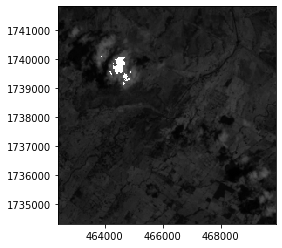

In [0]:
##codecell_RasterLandscape_ImageDisplay

#read in the image 
full_img = dataset.read()

#we are checking the .shape of the image (do I have all my bands? See ##codecell_RasterLandscape_CheckShapOfBands)
full_img.shape 

# we are adding a wee bit of rasterio library here 
# import the show function which allows us to display the image
from rasterio.plot import show 

#then print the nir band with the whole image shape
#we would like to have a grayscale map (cmap)
print("Image dimensions: ", full_img.shape)
show(nir, transform=dataset.transform, cmap='gray')

In [0]:
##codecell_RasterLandscape_ImportUrLibraries
#more tools
import matplotlib   # matplotlib is the primary python plotting and viz library
import matplotlib.pyplot as plt

# this bit of magic allows matplotlib to plot inline in a jupyter notebook
#see also lab4_spatial patterns
%matplotlib inline  
import folium       # folium is an interactive mapping library


##**Raster dataset & physical properties of landscapes**## 
Some raster datasets will only have one band. These behave a bit like a black and white image. Rasters can contain as many bands as you like, and single band images can be combined into multiple band images (see above in *But what are image bands?*). Multiple band images are useful because you can calculate ratios between the different bands to enhance the visibility of certain features in your image.

#####**Let's visualise all bands**#####

In [0]:
# to make a multiple band raster add all the file paths to a list
s2_bands = [
            "http://ropitz.github.io/digitalantiquity/data/sentinel-2/2018-10-13_Sentinel-2BL1C_B02.tiff",
            "http://ropitz.github.io/digitalantiquity/data/sentinel-2/2018-10-13_Sentinel-2BL1C_B03.tiff",
            "http://ropitz.github.io/digitalantiquity/data/sentinel-2/2018-10-13_Sentinel-2BL1C_B04.tiff",
            "http://ropitz.github.io/digitalantiquity/data/sentinel-2/2018-10-13_Sentinel-2BL1C_B08.tiff"
]

# open these files and add all bands to an array
arrs = []
for band in s2_bands:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))

# convert the list to a numpy array
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
# let's check the shape of this array
sentinel_img.shape

(4, 2201, 2629)

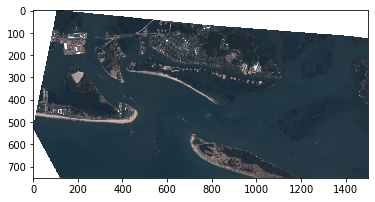

In [0]:
#clip to get a smaller area and show the multiple band image data
clipped_img = sentinel_img[:, 0:750:, 0:1500]
clipped_img.shape
show(clipped_img[[2,1,0], :, :])

You can see the different information held in each band by plotting a histogram of the raster dataset.

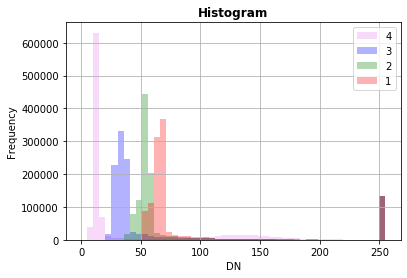

In [0]:
# plot a histogram of the data in each band
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

Even from simple visualizations we can see the contrast between the red and the near-infared (NIR) bands. Also note that the peak at 255 is simply from areas with no data which are labeled 255 on all bands. For example:


In [0]:

clipped_img[:,0,0]

array([255, 255, 255, 255], dtype=uint8)

Different band ratios will highlight different features in a raster dataset. We might be interested in finding places where cropmarks are located, for example. There are lots of band ratios that will highlight more green and more stressed vegetation. A common ratio that does this is called NDVI- the normalized difference vegetation index.

In [0]:
#calculate NDVI
# just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = clipped_img[3] # fourth band
bandRed = clipped_img[2] # second band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

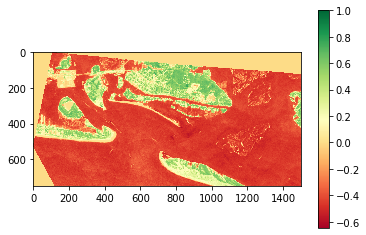

In [0]:
#show NDVI
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

##Using Raster## 

In this second part of the exercise, we'll be calculating some properties of the landscape like slope and aspect that are commonly used in analyses and models of where sites are likely to be visible


In [0]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 200kB/s 
     |████████████████████████████████| 10.1MB 156kB/s 


In [0]:
#more tools. all the tools really
from shapely.geometry import mapping
from shapely.geometry import Point
from rasterio.mask import mask
import geopandas as gpd
import zipfile
import io
import requests
import elevation
import richdem as rd
import gdal

And now get some data to start the second part of the exercise- a raster dataset representing elevation referred to as a DEM or 'digital elevation model'.

In [0]:
#fetch elevation data from the SRTM server and clip to our area of interest
dem_path = os.path.join(os.getcwd(), 'areaDEM.tif')
elevation.clip(bounds=(5.1, 43.65, 5.5, 43.95), output=dem_path)

NameError: ignored

In [0]:
#check the DEM has loaded nicely by plotting it
areaDEM = rd.LoadGDAL(dem_path)
plt.imshow(areaDEM, interpolation='none')
plt.colorbar()
plt.show()

Compute and plot slope and aspect

You can use the rd.TerrainAttribute function to compute slope and aspect for each pixel. Note that there are multiple ways to represent the slope values. Read the richdem docs for more options.

To visualize slope and aspect, you can use the rdShow function.

In [0]:
slope = rd.TerrainAttribute(areaDEM, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))
plt.show()

In [0]:
# now do the same thing to calculate and plot the aspect data
aspect = rd.TerrainAttribute(areaDEM, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(8, 5.5))
plt.show()

Contours, a common way to visualize elevation data, can also be derived from a raster.

In [0]:
#open the raster file using gdal
gdal_data = gdal.Open(dem_path)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

In [0]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
#Plot our data with Matplotlib's 'contourf' to get filled contours
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

That's it for this lesson. Hopefully you've seen how you can access and manipulate raster data to represent the landscape or environmental factors. 

#**LexiCode**#
To re-use the codes - you will need to first load their respective libraries.  So far, you have used ...:


<br>

> **libraries** | | |
>--- |--- | --- | 
>folium | numpy  | [rasterio](https://rasterio.readthedocs.io/en/stable/quickstart.html)
>branca| rtree | [richdem](https://richdem.readthedocs.io/en/latest/)
>pandas| osmnx| [elevation](https://pypi.org/project/elevation/)
>geopandas| requests | 
>seaborn | fiona| 
>matplotlib.pyplot | ipywidgets|
> pysal |seaborn |
> 
<br>


 **plugins**| |
--- |--- |
HeatMapWithTime |rasterio.plot
HeatMap
MeasureControl
PrepareUrBasemaps_CreateLayers from [folium.plugins]
cluster (from sklearn)

<br>

your lexicode is non-exhaustive, keep expanding, find your own 'best way' to reuse these code/scripts...

<br>

>Lexicode_MakingaBasicMap | Lexicode_Webmaps&Distributions |Lexicode_StreetGridOrientations | Lexicode_SpatialPatterns | Lexicode_RasterLandscape
>--- | --- | ---|---|----|
> ==   () [] | pd.concat() | { } *subselection from list*|%matplotlib inline  | .open()
>.head_csv() | .dtype() | ox.gdf_from_places()|requests.get()|.print()
>.read_csv() | astype() | ox.plot_shape()|request.content()|dataset.name|
>mean()  | fillna()|network_type= ''|.bytes()|dataset.count|
>folium.Map | def return |ox.add_edge_bearings(ox.get_undirected())|gpd.GeoDataFrame.from_features()|dataset.shape|
>range() | .apply(lambda x:*function*,axis=) |count_and_merge()|Set()|dataset.descriptions|
>len() | pd.merge() |np.arrange()|pd.value_counts() |dataset.meta|
>iloc[]| how= , left_index= ,left_index= |np.histogram()|.merge()|dataset.driver|
>.value_counts()| gpd.GeoDataFrame()| ax.set_theta_location()|.sort_values|dataset.read
>if =:| geometry=gpd.points_from_xy |ax.set_ylim()|cluster.KMeans()|.shape
>elif =: |print() |ax.set_title()|.fit()|np.amean()
>else =:| .isin()|ax.set_yticks()|.drop() |np.amin ()
>folium.Marker()| classic.plot()|ax.set_xlabels() & ax.set_yticklabels|.assign()|np.amax()
>folium.Icon()| generateBaseMap()|plt.subplots()|plt.show()|np.std()
>folium.Circle| .groupby(['', ''])|.dropna()|.set_title|show()
>popup= | .reset_index() |polar_plot()|sns.pairplot()|cmap=
>radius= |  max_zoom= |pd.Series()|
>.values.tolist() |folium.TileLayer()|np.pi|
>.add_to()| plugins.DualMap(location= , tiles= , zoom_start= )| 

